# TASK 2

# Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

# Step 1: Load and Understand the Dataset

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Preview:\n", titanic.head())

# Basic information about the dataset
print("\nDataset Info:")
print(titanic.info())

# Summary statistics
print("\nSummary Statistics:")
print(titanic.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(titanic.isnull().sum())


Dataset Preview:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

# STEP 2: Perform Data Cleaning

In [22]:
# 1. Fill missing values in 'Age' with the median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# 2. Fill missing values in 'Embarked' with the mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# 3. Drop 'Cabin' column (due to too many missing values)
if 'Cabin' in titanic.columns:
    titanic.drop('Cabin', axis=1, inplace=True)

# 4. Drop duplicate rows, if any
titanic.drop_duplicates(inplace=True)

# Verify if cleaning is successful
print("\nMissing Values After Cleaning:")
print(titanic.isnull().sum())


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# STEP 3: Perform Univariate Analysis

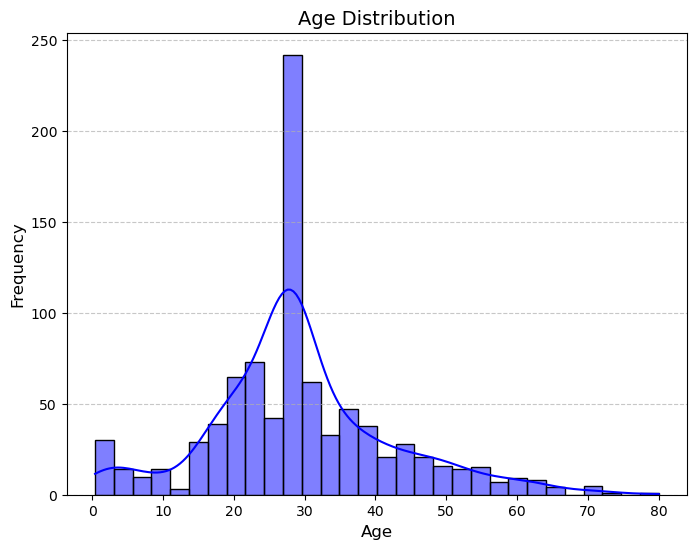

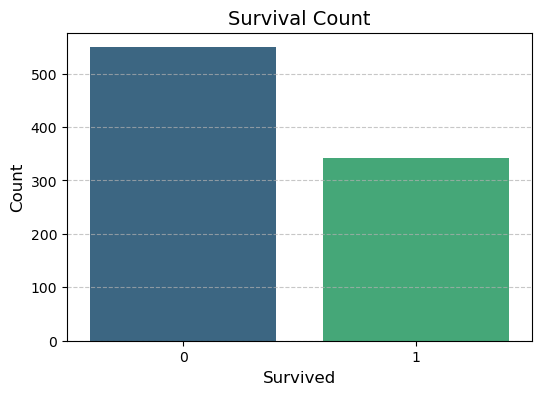

In [31]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Age' column is numeric before plotting
if titanic['Age'].dtype != 'float64' and titanic['Age'].dtype != 'int64':
    titanic['Age'] = pd.to_numeric(titanic['Age'], errors='coerce')

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(titanic['Age'].dropna(), kde=True, bins=30, color='blue')  # Dropping NaN for histogram
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Countplot for Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Survived', data=titanic, palette='viridis', dodge=False, legend=False)
plt.title('Survival Count', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# STEP 4: Perform Bivariate Analysis

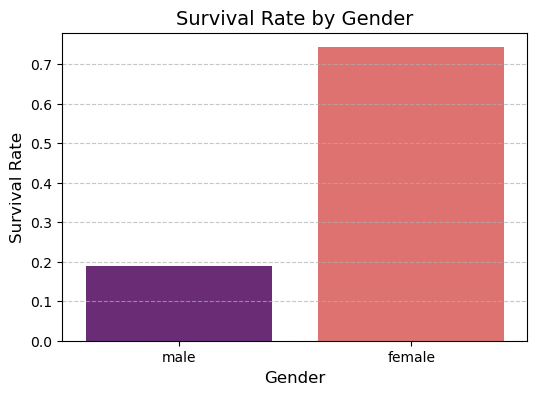

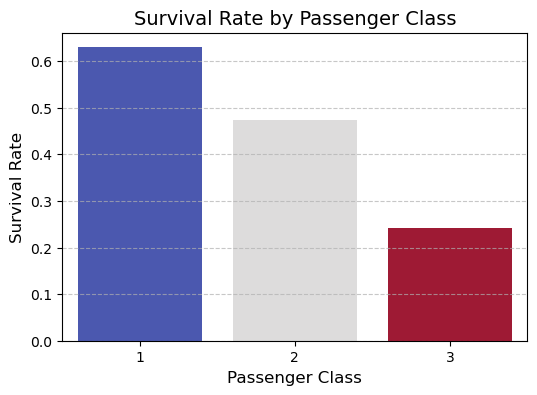

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', hue='Sex', data=titanic, dodge=False, palette='magma', errorbar=None)
plt.title('Survival Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend([],[], frameon=False)  # Remove legend as it's redundant in this context
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Survival rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=titanic, dodge=False, palette='coolwarm', errorbar=None)
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend([],[], frameon=False)  # Remove legend as it's redundant in this context
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# STEP 5: Explore Pairwise Relationships

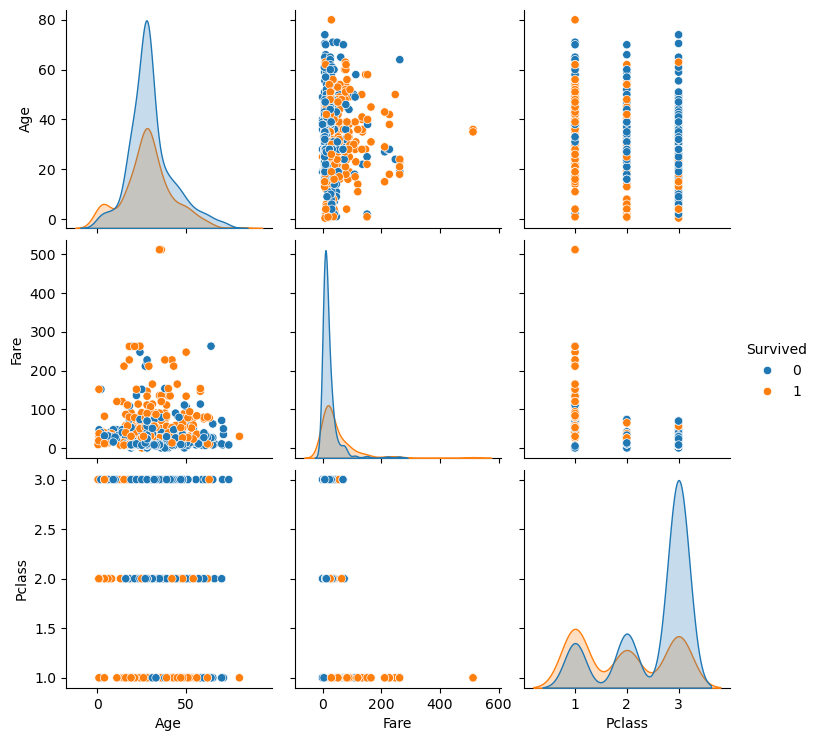

In [41]:
# Pairplot for numeric variables
sns.pairplot(titanic, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.show()


# STEP 6: Correlation Analysis

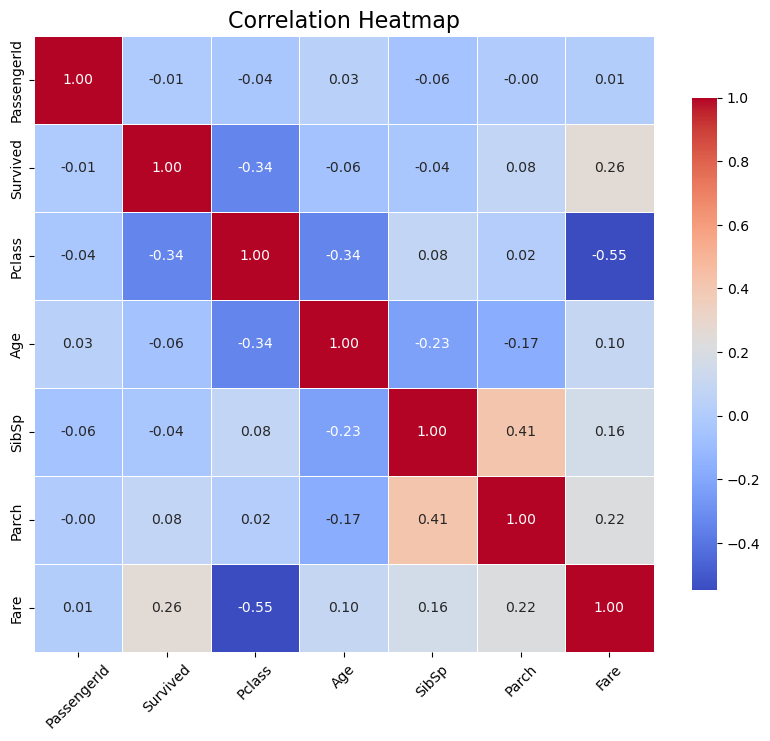

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numerical columns only
correlation_matrix = titanic.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# STEP 7 : Cleaned Dataset Export:

In [51]:
# Save the cleaned dataset
titanic.to_csv('cleaned_titanic.csv', index=False)